In [11]:
# ============================================================
# CELL 2 — Define outliers + save outlier table
# ============================================================

OUT_DIR = "./outputs_temporal_outliers"
os.makedirs(OUT_DIR, exist_ok=True)

OUTLIER_PERCENTILE = 0.05   # bottom 5%
LOWEST_N = 20

thr = float(df[score_col].quantile(OUTLIER_PERCENTILE))
df["is_outlier_pctl"] = df[score_col] <= thr

df["rank_asc"] = df[score_col].rank(method="first", ascending=True)
df["is_outlier_lowN"] = df["rank_asc"] <= LOWEST_N

print("✅ Outlier threshold (global):")
print(f" - percentile: {OUTLIER_PERCENTILE*100:.1f}%")
print(f" - threshold: {thr:.6f}")
print(f" - outliers (percentile): {int(df['is_outlier_pctl'].sum())} / {len(df)}")
print(f" - outliers (lowest {LOWEST_N}): {int(df['is_outlier_lowN'].sum())} / {len(df)}")

# Save reusable outlier table (percentile-based)
outliers_tbl = df[df["is_outlier_pctl"]].sort_values(score_col).copy()
outliers_csv = os.path.join(OUT_DIR, "outliers_percentile_based.csv")
outliers_tbl.to_csv(outliers_csv, index=False)

print("✅ Saved:", outliers_csv)
outliers_tbl.head(10)


✅ Outlier threshold (global):
 - percentile: 5.0%
 - threshold: 0.232342
 - outliers (percentile): 38 / 754
 - outliers (lowest 20): 20 / 754
✅ Saved: ./outputs_temporal_outliers/outliers_percentile_based.csv


,doi,paperId,title,abstract,year,venue_name,publicationTypes,authors,url,_status,...,title_crossref,year_s2,year_cr,year_final,alignment_score_max,alignment_score_topk_mean,year_int,is_outlier_pctl,rank_asc,is_outlier_lowN
623,10.1007/s10994-022-06235-3,86850f55d9ef83e335585dc868d4104b6b50f3bf,3DVerifier: efficient robustness verification ...,3D point cloud models are widely applied in sa...,2022,Machine-mediated learning,JournalArticle,Ronghui Mu; Wenjie Ruan; L. Marcolino; Q. Ni,https://www.semanticscholar.org/paper/86850f55...,ok,...,3DVerifier: efficient robustness verification ...,2022.0,2022,2022.0,0.142641,0.126197,2022,True,1.0,True
279,10.1007/s10994-022-06160-5,30926e65863609064b24548344d80b2a470b899b,Heterogeneous graph embedding with single-leve...,There has been an increasing interest in devel...,2022,Machine-mediated learning,JournalArticle,Nuttapong Chairatanakul; Xin Liu; Nguyen Thai ...,https://www.semanticscholar.org/paper/30926e65...,ok,...,Heterogeneous graph embedding with single-leve...,2022.0,2022,2022.0,0.184093,0.162599,2022,True,2.0,True
530,10.1007/s10994-023-06435-5,506c1308a227b2b173d37736823a51b1af234e27,Style spectroscope: improve interpretability a...,Universal style transfer (UST) infuses styles ...,2022,Machine-mediated learning,JournalArticle,Zhiyu Jin; Xuli Shen; Bin Li; Xiangyang Xue,https://www.semanticscholar.org/paper/506c1308...,ok,...,Style spectroscope: improve interpretability a...,2022.0,2024,2022.0,0.189074,0.171384,2022,True,3.0,True
167,10.1007/s10994-023-06499-3,8f5091aa68fc04c751ef1ff1710f5feb315fe568,When are they coming? Understanding and foreca...,Futbol Club Barcelona operates the largest sta...,2024,Machine-mediated learning,JournalArticle,Feliu Serra-Burriel; Pedro Delicado; F. Cucchi...,https://www.semanticscholar.org/paper/8f5091aa...,ok,...,When are they coming? Understanding and foreca...,2024.0,2024,2024.0,0.181567,0.175687,2024,True,4.0,True
365,10.1007/s10994-023-06508-5,ad5f16c815b9bdece9e7093d67b39aa2c8a9fa6c,Differentially private Riemannian optimization,"In this paper, we study the differentially pri...",2022,Machine-mediated learning,JournalArticle,Andi Han; Bamdev Mishra; Pratik Jawanpuria; Ju...,https://www.semanticscholar.org/paper/ad5f16c8...,ok,...,Differentially private Riemannian optimization,2022.0,2024,2022.0,0.195437,0.179925,2022,True,5.0,True
46,10.1007/s10994-022-06252-2,38170bc251503917b728585085d5bbc339d00081,DIMBA: discretely masked black-box attack in s...,The adversarial attack can force a CNN-based m...,2022,Machine-mediated learning,JournalArticle,Xiangyu Yin; Wenjie Ruan; J. Fieldsend,https://www.semanticscholar.org/paper/38170bc2...,ok,...,DIMBA: discretely masked black-box attack in s...,2022.0,2022,2022.0,0.221046,0.183160,2022,True,6.0,True
615,10.1007/s10994-024-06575-2,37afc98003c4f8385dfbf6307ab56c19309ce2d7,PROUD: PaRetO-gUided diffusion model for multi...,Recent advancements in the realm of deep gener...,2024,Machine-mediated learning,JournalArticle,Yinghua Yao; Yuangang Pan; Jing Li; Ivor W. Ts...,https://www.semanticscholar.org/paper/37afc980...,ok,...,PROUD: PaRetO-gUided diffusion model for multi...,2024.0,2024,2024.0,0.210562,0.183238,2024,True,7.0,True
367,10.1007/s10994-022-06258-w,b7fd072f79510524933478bf0f3f50550cea1c38,Riemannian block SPD coupling manifold and its...,"In this work, we study the optimal transport (...",2022,Machine-mediated learning,JournalArticle,Andi Han; Bamdev Mishra; Pratik Jawanpuria; Ju...,https://www.semanticscholar.org/paper/b7fd072f...,ok,...,Riemannian block SPD coupling manifold and its...,2022.0,2022,2022.0,0.233673,0.185434,2022,True,8.0,True
731,10.1007/s10994-021-05970-3,aa267677c0f31cc2714f7a214722910ed5b8669b,"SPEED: secure, PrivatE, and efficient deep lea...",We introduce a deep learning framework able to...,2020,Machine-mediated learning,JournalArticle,Arnaud Grivet S'ebert; Rafael Pinot; Martin Zu...,https://www.semanticscholar.org/paper/aa267677...,ok,...,"SPEED: secure, PrivatE, an

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Load scored dataset
# -----------------------------
SCORED_CANDIDATES = [
    "./outputs_p7/machine_learning_scored_2016_2025.csv",
    "outputs_p7/machine_learning_scored_2016_2025.csv",
    "./machine_learning_scored_2016_2025.csv",
    "machine_learning_scored_2016_2025.csv",
]

scored_path = next((p for p in SCORED_CANDIDATES if os.path.exists(p)), None)
if scored_path is None:
    raise FileNotFoundError("Scored CSV not found. Upload it or check path.")

df = pd.read_csv(scored_path)
print("✅ Loaded:", scored_path, "shape=", df.shape)

# -----------------------------
# 2) Year normalize
# -----------------------------
if "year_int" in df.columns:
    df["year_int"] = pd.to_numeric(df["year_int"], errors="coerce")
elif "year_final" in df.columns:
    df["year_int"] = pd.to_numeric(df["year_final"], errors="coerce")
elif "year" in df.columns:
    df["year_int"] = pd.to_numeric(df["year"], errors="coerce")
else:
    raise ValueError("No year column found (year_int/year_final/year).")

df = df.dropna(subset=["year_int"]).copy()
df["year_int"] = df["year_int"].astype(int)

# -----------------------------
# 3) Score column select
# -----------------------------
SCORE_CANDIDATES = ["alignment_score_topk_mean", "alignment_score_max", "alignment_score", "score"]
score_col = next((c for c in SCORE_CANDIDATES if c in df.columns), None)
if score_col is None:
    raise ValueError("No alignment score column found.")

df[score_col] = pd.to_numeric(df[score_col], errors="coerce")
df = df.dropna(subset=[score_col]).copy()

print("✅ year range:", df["year_int"].min(), "-", df["year_int"].max())
print("✅ score_col:", score_col)
print(df[score_col].describe())


✅ Loaded: ./machine_learning_scored_2016_2025.csv shape= (754, 20)
✅ year range: 2016 - 2025
✅ score_col: alignment_score_topk_mean
count    754.000000
mean       0.351379
std        0.071186
min        0.126197
25%        0.305338
50%        0.350573
75%        0.402525
max        0.627483
Name: alignment_score_topk_mean, dtype: float64


In [22]:
OUT_DIR = "./outputs_temporal_outliers"
os.makedirs(OUT_DIR, exist_ok=True)

OUTLIER_PERCENTILE = 0.05   # bottom 5% (global)
LOWEST_N = 20

thr_global = float(df[score_col].quantile(OUTLIER_PERCENTILE))
df["is_outlier_global_pctl"] = df[score_col] <= thr_global

df["rank_asc"] = df[score_col].rank(method="first", ascending=True)
df["is_outlier_lowN"] = df["rank_asc"] <= LOWEST_N

print("✅ Global outlier threshold:")
print(f" - bottom {OUTLIER_PERCENTILE*100:.1f}% => thr = {thr_global:.6f}")
print(f" - outliers = {int(df['is_outlier_global_pctl'].sum())} / {len(df)}")

outliers_tbl = df[df["is_outlier_global_pctl"]].sort_values(score_col).copy()
outliers_csv = os.path.join(OUT_DIR, "outliers_global_bottom5pct.csv")
outliers_tbl.to_csv(outliers_csv, index=False)
print("✅ Saved:", outliers_csv)
outliers_tbl.head(10)


✅ Global outlier threshold:
 - bottom 5.0% => thr = 0.232342
 - outliers = 38 / 754
✅ Saved: ./outputs_temporal_outliers/outliers_global_bottom5pct.csv


,doi,paperId,title,abstract,year,venue_name,publicationTypes,authors,url,_status,...,year_s2,year_cr,year_final,alignment_score_max,alignment_score_topk_mean,year_int,is_outlier_global_pctl,rank_asc,is_outlier_lowN,topic_id
623,10.1007/s10994-022-06235-3,86850f55d9ef83e335585dc868d4104b6b50f3bf,3DVerifier: efficient robustness verification ...,3D point cloud models are widely applied in sa...,2022,Machine-mediated learning,JournalArticle,Ronghui Mu; Wenjie Ruan; L. Marcolino; Q. Ni,https://www.semanticscholar.org/paper/86850f55...,ok,...,2022.0,2022,2022.0,0.142641,0.126197,2022,True,1.0,True,3
279,10.1007/s10994-022-06160-5,30926e65863609064b24548344d80b2a470b899b,Heterogeneous graph embedding with single-leve...,There has been an increasing interest in devel...,2022,Machine-mediated learning,JournalArticle,Nuttapong Chairatanakul; Xin Liu; Nguyen Thai ...,https://www.semanticscholar.org/paper/30926e65...,ok,...,2022.0,2022,2022.0,0.184093,0.162599,2022,True,2.0,True,4
530,10.1007/s10994-023-06435-5,506c1308a227b2b173d37736823a51b1af234e27,Style spectroscope: improve interpretability a...,Universal style transfer (UST) infuses styles ...,2022,Machine-mediated learning,JournalArticle,Zhiyu Jin; Xuli Shen; Bin Li; Xiangyang Xue,https://www.semanticscholar.org/paper/506c1308...,ok,...,2022.0,2024,2022.0,0.189074,0.171384,2022,True,3.0,True,2
167,10.1007/s10994-023-06499-3,8f5091aa68fc04c751ef1ff1710f5feb315fe568,When are they coming? Understanding and foreca...,Futbol Club Barcelona operates the largest sta...,2024,Machine-mediated learning,JournalArticle,Feliu Serra-Burriel; Pedro Delicado; F. Cucchi...,https://www.semanticscholar.org/paper/8f5091aa...,ok,...,2024.0,2024,2024.0,0.181567,0.175687,2024,True,4.0,True,-1
365,10.1007/s10994-023-06508-5,ad5f16c815b9bdece9e7093d67b39aa2c8a9fa6c,Differentially private Riemannian optimization,"In this paper, we study the differentially pri...",2022,Machine-mediated learning,JournalArticle,Andi Han; Bamdev Mishra; Pratik Jawanpuria; Ju...,https://www.semanticscholar.org/paper/ad5f16c8...,ok,...,2022.0,2024,2022.0,0.195437,0.179925,2022,True,5.0,True,0
46,10.1007/s10994-022-06252-2,38170bc251503917b728585085d5bbc339d00081,DIMBA: discretely masked black-box attack in s...,The adversarial attack can force a CNN-based m...,2022,Machine-mediated learning,JournalArticle,Xiangyu Yin; Wenjie Ruan; J. Fieldsend,https://www.semanticscholar.org/paper/38170bc2...,ok,...,2022.0,2022,2022.0,0.221046,0.183160,2022,True,6.0,True,3
615,10.1007/s10994-024-06575-2,37afc98003c4f8385dfbf6307ab56c19309ce2d7,PROUD: PaRetO-gUided diffusion model for multi...,Recent advancements in the realm of deep gener...,2024,Machine-mediated learning,JournalArticle,Yinghua Yao; Yuangang Pan; Jing Li; Ivor W. Ts...,https://www.semanticscholar.org/paper/37afc980...,ok,...,2024.0,2024,2024.0,0.210562,0.183238,2024,True,7.0,True,-1
367,10.1007/s10994-022-06258-w,b7fd072f79510524933478bf0f3f50550cea1c38,Riemannian block SPD coupling manifold and its...,"In this work, we study the optimal transport (...",2022,Machine-mediated learning,JournalArticle,Andi Han; Bamdev Mishra; Pratik Jawanpuria; Ju...,https://www.semanticscholar.org/paper/b7fd072f...,ok,...,2022.0,2022,2022.0,0.233673,0.185434,2022,True,8.0,True,-1
731,10.1007/s10994-021-05970-3,aa267677c0f31cc2714f7a214722910ed5b8669b,"SPEED: secure, PrivatE, and efficient deep lea...",We introduce a deep learning framework able to...,2020,Machine-mediated learning,JournalArticle,Arnaud Grivet S'ebert; Rafael Pinot; Martin Zu...,https://www.semanticscholar.org/paper/aa267677...,ok,...,2020.0,2021,2020.0,0.226624,0.186300,2020,True,9.0,True,16
480,10.1007/s10994-024-06648-2,1d7dedaea52a1f2454ccab84789d1bd8fdfa65d6,Interactive sequential generative models for t...,Understanding spatiotemporal coordination of p...,2025,Machine-mediated learning,JournalArticle,Dennis Fassmeyer; Moritz Cordes; Ulf Brefeld,https://www.semanticscholar.org/paper/1d7dedae...,ok,...,2025.0,2025,2025.0,0.1974

✅ Saved: ./outputs_temporal_outliers/temporal_outlier_rate_by_year.csv


,year_int,n,outliers,outlier_rate
0,2016,25,1,0.040000
1,2017,31,0,0.000000
2,2018,46,1,0.021739
3,2019,60,1,0.016667
4,2020,102,4,0.039216
5,2021,121,4,0.033058
6,2022,114,14,0.122807
7,2023,110,2,0.018182
8,2024,98,9,0.091837
9,2025,47,2,0.042553


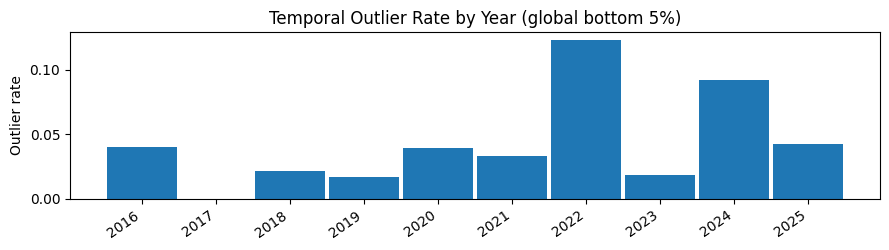

✅ Saved figure: ./outputs_temporal_outliers/fig_outlier_rate_by_year.png


In [23]:
yearly_counts = (
    df.groupby("year_int")
      .agg(n=("year_int", "size"),
           outliers=("is_outlier_global_pctl", "sum"))
      .reset_index()
)
yearly_counts["outlier_rate"] = yearly_counts["outliers"] / yearly_counts["n"]

# Save table
yearly_csv = os.path.join(OUT_DIR, "temporal_outlier_rate_by_year.csv")
yearly_counts.to_csv(yearly_csv, index=False)
print("✅ Saved:", yearly_csv)
display(yearly_counts)

# Plot (bars touching)
plt.figure(figsize=(9, 2.6))
plt.bar(yearly_counts["year_int"], yearly_counts["outlier_rate"], width=0.95)
plt.xticks(yearly_counts["year_int"], rotation=35, ha="right")
plt.ylabel("Outlier rate")
plt.title("Temporal Outlier Rate by Year (global bottom 5%)")
plt.tight_layout()

fig_path = os.path.join(OUT_DIR, "fig_outlier_rate_by_year.png")
plt.savefig(fig_path, dpi=200)
plt.show()
print("✅ Saved figure:", fig_path)


✅ Saved: ./outputs_temporal_outliers/temporal_score_tail_stats_by_year.csv


,year,n,min,p05,p10,p25,median,mean,p75,p90,max
0,2016,25,0.212647,0.255846,0.289523,0.309690,0.361613,0.355021,0.407029,0.426725,0.484761
1,2017,31,0.242933,0.272309,0.281618,0.360024,0.390611,0.383894,0.427291,0.459691,0.492517
2,2018,46,0.228510,0.275650,0.284414,0.301848,0.364463,0.365180,0.421340,0.455050,0.487467
3,2019,60,0.194934,0.265856,0.278107,0.321059,0.359985,0.362715,0.405556,0.434376,0.540802
4,2020,102,0.186300,0.238878,0.265638,0.304747,0.343497,0.353440,0.407753,0.447831,0.627483
5,2021,121,0.186700,0.244875,0.271542,0.318993,0.371335,0.364210,0.410358,0.454176,0.512763
6,2022,114,0.126197,0.187783,0.227016,0.289580,0.336655,0.339228,0.395870,0.438273,0.573087
7,2023,110,0.207266,0.246379,0.274381,0.305573,0.347473,0.345210,0.381958,0.415958,0.513720
8,2024,98,0.175687,0.215506,0.247562,0.292714,0.337975,0.340580,0.389514,0.426136,0.500842
9,2025,47,0.186651,0.241930,0.245786,0.285874,0.324511,0.328944,0.367358,0.421044,0.459600


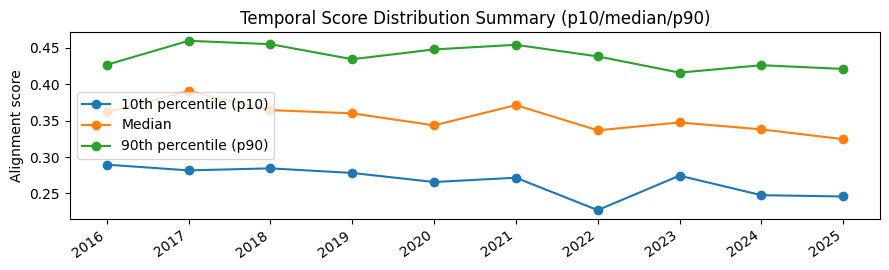

✅ Saved figure: ./outputs_temporal_outliers/fig_score_tail_trends_p10_median_p90.png


In [24]:
def q(x, p):
    return float(np.quantile(x, p))

yearly_stats = []
for y, g in df.groupby("year_int"):
    s = g[score_col].values
    yearly_stats.append({
        "year": int(y),
        "n": int(len(s)),
        "min": q(s, 0.00),
        "p05": q(s, 0.05),
        "p10": q(s, 0.10),
        "p25": q(s, 0.25),
        "median": q(s, 0.50),
        "mean": float(np.mean(s)),
        "p75": q(s, 0.75),
        "p90": q(s, 0.90),
        "max": q(s, 1.00),
    })

yearly_stats = pd.DataFrame(yearly_stats).sort_values("year")
stats_csv = os.path.join(OUT_DIR, "temporal_score_tail_stats_by_year.csv")
yearly_stats.to_csv(stats_csv, index=False)
print("✅ Saved:", stats_csv)
display(yearly_stats)

# Plot: p10 + median + p90 trend
plt.figure(figsize=(9, 2.8))
plt.plot(yearly_stats["year"], yearly_stats["p10"], marker="o", label="10th percentile (p10)")
plt.plot(yearly_stats["year"], yearly_stats["median"], marker="o", label="Median")
plt.plot(yearly_stats["year"], yearly_stats["p90"], marker="o", label="90th percentile (p90)")
plt.xticks(yearly_stats["year"], rotation=35, ha="right")
plt.ylabel("Alignment score")
plt.title("Temporal Score Distribution Summary (p10/median/p90)")
plt.legend()
plt.tight_layout()

fig_path = os.path.join(OUT_DIR, "fig_score_tail_trends_p10_median_p90.png")
plt.savefig(fig_path, dpi=200)
plt.show()
print("✅ Saved figure:", fig_path)


/tmp/ipython-input-3772047488.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=years, showfliers=False)


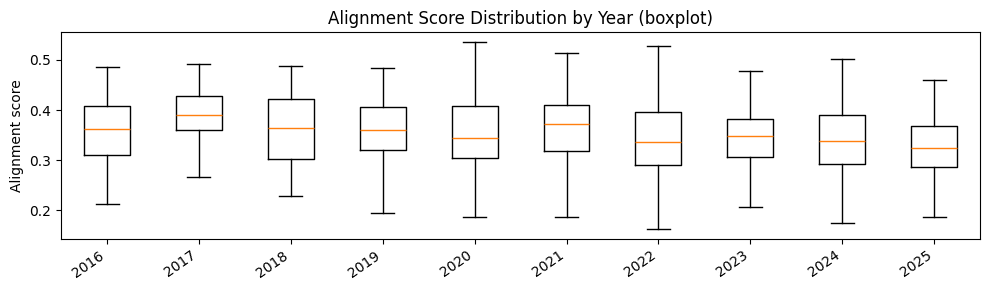

✅ Saved figure: ./outputs_temporal_outliers/fig_score_distribution_boxplot_by_year.png


In [25]:
years = sorted(df["year_int"].unique())
data = [df.loc[df["year_int"] == y, score_col].values for y in years]

plt.figure(figsize=(10, 3))
plt.boxplot(data, labels=years, showfliers=False)
plt.xticks(rotation=35, ha="right")
plt.ylabel("Alignment score")
plt.title("Alignment Score Distribution by Year (boxplot)")
plt.tight_layout()

fig_path = os.path.join(OUT_DIR, "fig_score_distribution_boxplot_by_year.png")
plt.savefig(fig_path, dpi=200)
plt.show()
print("✅ Saved figure:", fig_path)


In [26]:
TOPICS_NPY_CANDIDATES = [
    "topics.npy",
    "topics.npy",
]

if "topic_id" in df.columns:
    print("✅ topic_id found in scored CSV.")
else:
    topics_path = next((p for p in TOPICS_NPY_CANDIDATES if os.path.exists(p)), None)
    if topics_path is None:
        raise FileNotFoundError("topic_id not in CSV and topics.npy not found. Upload topics.npy or rerun BERTopic notebook.")
    topics = np.load(topics_path, allow_pickle=True)
    if len(topics) != len(df):
        raise ValueError(f"topics.npy length ({len(topics)}) != df length ({len(df)}). "
                         "You must use the same scored CSV order used when fitting BERTopic.")
    df["topic_id"] = topics
    print("✅ Loaded topic_id from:", topics_path)


✅ topic_id found in scored CSV.


✅ Saved: ./outputs_temporal_outliers/temporal_outlier_topic_share_pivot.csv


topic_id,-1,0,2,3,4,8,10,14
year_int,,,,,,,,
2016,0.000000,0.000000,0.000000,0.000000,1.000000,0.00,0.000000,0.00
2018,1.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00
2019,0.000000,1.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00
2020,0.250000,0.000000,0.250000,0.000000,0.250000,0.00,0.000000,0.00
2021,0.000000,0.000000,0.000000,0.000000,0.250000,0.25,0.000000,0.25
2022,0.071429,0.285714,0.214286,0.285714,0.071429,0.00,0.071429,0.00
2023,0.000000,0.000000,0.000000,0.000000,1.000000,0.00,0.000000,0.00
2024,0.666667,0.111111,0.111111,0.000000,0.000000,0.00,0.111111,0.00
2025,0.500000,0.000000,0.500000,0.000000,0.000000,0.00,0.000000,0.00


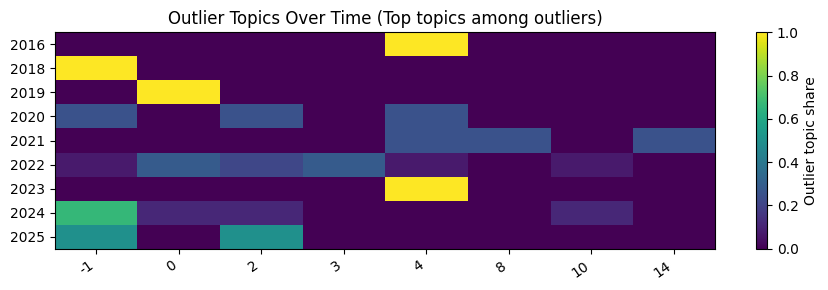

✅ Saved figure: ./outputs_temporal_outliers/fig_outlier_topics_heatmap.png


In [27]:
out_df = df[df["is_outlier_global_pctl"]].copy()

# topic counts per year among outliers
out_topic_year = (
    out_df.groupby(["year_int", "topic_id"])
          .size()
          .reset_index(name="outlier_count")
)

# normalize to shares per year
year_tot = out_topic_year.groupby("year_int")["outlier_count"].sum().reset_index(name="year_outliers")
out_topic_year = out_topic_year.merge(year_tot, on="year_int", how="left")
out_topic_year["outlier_topic_share"] = out_topic_year["outlier_count"] / out_topic_year["year_outliers"]

# choose top topics overall among outliers (for readable plot)
top_topics = (
    out_df["topic_id"].value_counts().head(8).index.tolist()
)

pivot = (
    out_topic_year[out_topic_year["topic_id"].isin(top_topics)]
    .pivot(index="year_int", columns="topic_id", values="outlier_topic_share")
    .fillna(0.0)
    .sort_index()
)

pivot_csv = os.path.join(OUT_DIR, "temporal_outlier_topic_share_pivot.csv")
pivot.to_csv(pivot_csv)
print("✅ Saved:", pivot_csv)
display(pivot)

# Heatmap
plt.figure(figsize=(9, 3))
plt.imshow(pivot.values, aspect="auto")
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xticks(range(len(pivot.columns)), [str(t) for t in pivot.columns], rotation=35, ha="right")
plt.colorbar(label="Outlier topic share")
plt.title("Outlier Topics Over Time (Top topics among outliers)")
plt.tight_layout()

fig_path = os.path.join(OUT_DIR, "fig_outlier_topics_heatmap.png")
plt.savefig(fig_path, dpi=200)
plt.show()
print("✅ Saved figure:", fig_path)
